# Importing Libraries

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re


# Load Data 

In [16]:


# Load dataset safely, disabling mixed-type warning
df = pd.read_csv(r"..\data\Kaggle_dataset\kindle_reviews.csv", 
                 encoding='latin-1', 
                 low_memory=False)

print("Kindle_reviews dataset shape:", df.shape)



Kindle_reviews dataset shape: (71221, 10)


# View Data

In [17]:
# Display basic information about the Kindle Reviews dataset

print("\nKindle Reviews Dataset Overview:\n")
print("Dataset Shape:", df.shape)

# Dataset info
print("\nDataset Information:")
df.info()

# Statistical summary (only for numeric columns)
print("\nStatistical Summary:")
df.describe()




Kindle Reviews Dataset Overview:

Dataset Shape: (71221, 10)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71221 entries, 0 to 71220
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      71221 non-null  int64 
 1   asin            71221 non-null  object
 2   helpful         71221 non-null  object
 3   overall         71221 non-null  int64 
 4   reviewText      71219 non-null  object
 5   reviewTime      71221 non-null  object
 6   reviewerID      71221 non-null  object
 7   reviewerName    70644 non-null  object
 8   summary         71206 non-null  object
 9   unixReviewTime  71221 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 5.4+ MB

Statistical Summary:


,Unnamed: 0,overall,unixReviewTime
count,71221.000000,71221.000000,7.122100e+04
mean,35611.000000,4.109125,1.354815e+09
std,20559.876098,1.166832,3.103961e+07
min,1.000000,1.000000,9.602496e+08
25%,17806.000000,4.000000,1.331338e+09
50%,35611.000000,5.000000,1.359072e+09
75%,53416.000000,5.000000,1.378339e+09
max,71221.000000,5.000000,1.405901e+09


In [18]:

print("\nRandom 5 samples:")
df.sample(5, random_state=42)



Random 5 samples:


,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
70407,70408,B005OMWXZE,"[0, 0]",5,"This book was fantastic!!!! Seriously, it was...","06 8, 2012",A1A7YPC6UBZZIY,Liz @ Fictional Candy,Beautiful and Emotional,1339113600
21104,21105,B0052N9ZJM,"[7, 10]",5,In my eyes there is nothing more delicious tha...,"05 27, 2011",A4SQFN8YODDVU,M. Lapierre,Fantastic!!!,1306454400
54732,54733,B006ML8JCW,"[0, 0]",5,This was my first BDSM read ever and I really ...,"07 10, 2012",A1EMF8I90E8KT2,Raquell,Excellent!,1341878400
23628,23629,B000JMLBHU,"[0, 0]",5,I never read this great book growing up. Now ...,"03 31, 2013",A2G3C7LJGXLEGF,"mcampey ""Music Lover""",Newbie Tablet Reader,1364688000
15539,15540,B006PH59SU,"[0, 0]",4,"Short vampire vignettes, formulaic, vampire fi...","07 4, 2013",A2HZPUUZKXPD7K,Zenhip,Short and fun,1372896000


In [19]:
# View sample records
print("\nFirst 5 rows:")
df.head()



First 5 rows:


,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1,B006N9LBPU,"[1, 1]",5,This was my first IR book I've read and it jus...,"02 29, 2012",A10NXUUY7O58JI,christian parker,Loved It :),1330473600
1,2,B003T0G6QU,"[0, 0]",4,In this book Holly is looking for her mother w...,"06 21, 2014",A3CMQYU4YPSAFM,Kathy,Presumed Dead,1403308800
2,3,B003CC15I4,"[1, 2]",5,Here we have a story about Keli and Phillip Go...,"10 9, 2013",A1FZV9IQRAQDUF,Jessica Gomez. (Athenajess),You have to take a chance.,1381276800
3,4,B0061JQMM4,"[1, 1]",4,I very much enjoyed reading about the Italian ...,"02 26, 2013",A31XW1RTQ4ZG9W,C. Yates,Italian village and the Nazi,1361836800
4,5,B0041KLBEE,"[0, 0]",4,Readers may be attracted by the curious title ...,"11 12, 2010",A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",Engaging Read,1289520000


In [20]:

print("\nLast 5 rows:")
df.tail()


Last 5 rows:


,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
71216,71217,B006GFXYPQ,"[4, 4]",5,I highly recommend this novel and I'm looking ...,"03 10, 2012",A1LVMI0YBYDIF5,Rebecca Scarberry,THE TWISTED WOODSTOCKS,1331337600
71217,71218,B005IZUXXQ,"[4, 5]",2,I agree with A CUSTOMER. The first two were g...,"11 22, 2011",A3F07ILXBN36LD,Edie O.,Disappointing.,1321920000
71218,71219,B0048EK1QW,"[1, 1]",5,I am so glad I read this book. This book of gu...,"09 28, 2013",A2QTW1LG2JGUEO,Amazon Customer,gotta read,1380326400
71219,71220,B0068UAZ8I,"[1, 4]",1,Not my thing at all. Quite disgusted an author...,"09 10, 2013",A1825GF4MPES5T,A. Womack,Not a good thing,1378771200
71220,71221,B006DJSRIO,"[1, 1]",4,Liked the story but wish it was longer. Will d...,"09 7, 2013",A217VNB3JD8MCL,AnnaMarie,Willow Creek Series,1378512000


# Rename columns

In [21]:
# Rename columns for better readability and consistency
df.rename(columns={'reviewText': 'Review', 'overall': 'Rating'}, inplace=True)

# Confirm the renaming
print("Columns after renaming:\n", df.columns.tolist())


Columns after renaming:
 ['Unnamed: 0', 'asin', 'helpful', 'Rating', 'Review', 'reviewTime', 'reviewerID', 'reviewerName', 'summary', 'unixReviewTime']


# Count missing values

In [22]:
# Count missing values in each column
missing_data = df.isnull().sum()

print("\nMissing Data Count per Column:")
print(missing_data)

# Total missing values in the dataset
total_missing = missing_data.sum()
print("\nTotal Missing Values in Dataset:", total_missing)




Missing Data Count per Column:
Unnamed: 0          0
asin                0
helpful             0
Rating              0
Review              2
reviewTime          0
reviewerID          0
reviewerName      577
summary            15
unixReviewTime      0
dtype: int64

Total Missing Values in Dataset: 594


# Handle Missing Data

In [23]:
# 1. Count missing values in 'Review' and 'Rating'
print("Missing values in Review and Rating before cleaning:")
print(df[['Review', 'Rating']].isnull().sum())

# 2. Drop rows with missing 'Review' or 'Rating'
df.dropna(subset=['Review', 'Rating'], inplace=True)

# 3. Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# 4. Verify after cleaning
print("\nAfter handling missing data:")
print(df[['Review', 'Rating']].isnull().sum())
print("Dataset shape:", df.shape)

# Detailed info and preview
print("\nDataset Information:")
df.info()

print("\nFirst 5 records:")
df.head()


Missing values in Review and Rating before cleaning:
Review    2
Rating    0
dtype: int64

After handling missing data:
Review    0
Rating    0
dtype: int64
Dataset shape: (71219, 10)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71219 entries, 0 to 71218
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      71219 non-null  int64 
 1   asin            71219 non-null  object
 2   helpful         71219 non-null  object
 3   Rating          71219 non-null  int64 
 4   Review          71219 non-null  object
 5   reviewTime      71219 non-null  object
 6   reviewerID      71219 non-null  object
 7   reviewerName    70642 non-null  object
 8   summary         71204 non-null  object
 9   unixReviewTime  71219 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 5.4+ MB

First 5 records:


,Unnamed: 0,asin,helpful,Rating,Review,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1,B006N9LBPU,"[1, 1]",5,This was my first IR book I've read and it jus...,"02 29, 2012",A10NXUUY7O58JI,christian parker,Loved It :),1330473600
1,2,B003T0G6QU,"[0, 0]",4,In this book Holly is looking for her mother w...,"06 21, 2014",A3CMQYU4YPSAFM,Kathy,Presumed Dead,1403308800
2,3,B003CC15I4,"[1, 2]",5,Here we have a story about Keli and Phillip Go...,"10 9, 2013",A1FZV9IQRAQDUF,Jessica Gomez. (Athenajess),You have to take a chance.,1381276800
3,4,B0061JQMM4,"[1, 1]",4,I very much enjoyed reading about the Italian ...,"02 26, 2013",A31XW1RTQ4ZG9W,C. Yates,Italian village and the Nazi,1361836800
4,5,B0041KLBEE,"[0, 0]",4,Readers may be attracted by the curious title ...,"11 12, 2010",A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",Engaging Read,1289520000


# Count Number of duplicates

In [24]:
# Count duplicates based on 'Review' and 'Rating'
duplicate_count = df.duplicated(subset=['Review', 'Rating']).sum()
print(f"Number of duplicate rows in dataset: {duplicate_count}")

# View sample duplicate rows
duplicates = df[df.duplicated(subset=['Review', 'Rating'], keep=False)]
print("\nSample duplicate rows:")
duplicates.head()


Number of duplicate rows in dataset: 2

Sample duplicate rows:


,Unnamed: 0,asin,helpful,Rating,Review,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
4865,4866,B0055ECOUA,"[0, 0]",5,This book is awesome and very informative.I am...,"05 29, 2012",A3VE0HAFA8A7HJ,"nikhilboorla ""nikhil""",awesome book,1338249600
50154,50157,B0067ZJVK2,"[0, 0]",4,Good,"07 21, 2014",AGPSYFEF7XE3N,Amazon Customer,Four Stars,1405900800
55421,55424,B0057H14KG,"[0, 0]",4,Good,"07 7, 2014",AXLQ0FE5KYQFO,sherilyn,Four Stars,1404691200
71047,71050,B0055ECOUA,"[1, 1]",5,This book is awesome and very informative.I am...,"10 8, 2012",A1N9DT5QF2KAJO,Bobby,Awesome!,1349654400


# Remove Duplicates

In [25]:
# 1. Remove exact duplicates (same Review + Rating)
df = df.drop_duplicates(subset=['Review', 'Rating'], keep='first')

# 2. Remove conflicting reviews (same Review text, different Ratings)
conflict_idx = df[df.duplicated(subset=['Review'], keep=False) & 
                   ~df.duplicated(subset=['Review', 'Rating'], keep=False)].index
df.drop(index=conflict_idx, inplace=True)

# 3. Reset index after removals
df.reset_index(drop=True, inplace=True)

# Verify the result
print("After removing duplicates and conflicts, dataset shape:", df.shape)
print("\nFirst 5 records:")
df.head()


After removing duplicates and conflicts, dataset shape: (71217, 10)

First 5 records:


,Unnamed: 0,asin,helpful,Rating,Review,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1,B006N9LBPU,"[1, 1]",5,This was my first IR book I've read and it jus...,"02 29, 2012",A10NXUUY7O58JI,christian parker,Loved It :),1330473600
1,2,B003T0G6QU,"[0, 0]",4,In this book Holly is looking for her mother w...,"06 21, 2014",A3CMQYU4YPSAFM,Kathy,Presumed Dead,1403308800
2,3,B003CC15I4,"[1, 2]",5,Here we have a story about Keli and Phillip Go...,"10 9, 2013",A1FZV9IQRAQDUF,Jessica Gomez. (Athenajess),You have to take a chance.,1381276800
3,4,B0061JQMM4,"[1, 1]",4,I very much enjoyed reading about the Italian ...,"02 26, 2013",A31XW1RTQ4ZG9W,C. Yates,Italian village and the Nazi,1361836800
4,5,B0041KLBEE,"[0, 0]",4,Readers may be attracted by the curious title ...,"11 12, 2010",A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",Engaging Read,1289520000


# Selecting Columns

In [26]:
# Keep only 'Rating' and 'Review' columns for modeling
df = df[['Rating', 'Review']]

# Confirm final dataset structure
print("Final dataset columns:", df.columns.tolist())
print("Final dataset shape:", df.shape)

df.head()


Final dataset columns: ['Rating', 'Review']
Final dataset shape: (71217, 2)


,Rating,Review
0,5,This was my first IR book I've read and it jus...
1,4,In this book Holly is looking for her mother w...
2,5,Here we have a story about Keli and Phillip Go...
3,4,I very much enjoyed reading about the Italian ...
4,4,Readers may be attracted by the curious title ...


# Grouping and Aggregation

In [27]:
# Count of reviews per rating
review_count_per_rating = df.groupby('Rating')['Review'].count()
print("Number of Reviews per Rating:\n", review_count_per_rating)

# Average rating
average_rating = df['Rating'].mean()
print("\nAverage Rating of Dataset:", round(average_rating, 2))

# Minimum and Maximum rating
min_rating = df['Rating'].min()
max_rating = df['Rating'].max()
print("Rating Range: {} to {}".format(min_rating, max_rating))

Number of Reviews per Rating:
 Rating
1     3786
2     5435
3     6000
4    19999
5    35997
Name: Review, dtype: int64

Average Rating of Dataset: 4.11
Rating Range: 1 to 5


# Cleaning text - remove emojis, special characters, symbols

In [28]:
import string

# Function to clean review text
def clean_text(text):
    # Convert to string in case of missing or non-string entries
    text = str(text)
    
    # Remove emojis and special unicode characters
    text = text.encode('ascii', 'ignore').decode('ascii')
    
    # Remove punctuation and symbols
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Convert to lowercase
    text = text.lower()
    
    return text

# Apply cleaning function to 'Review' column
df['Clean_Review'] = df['Review'].apply(clean_text)


print("Sample cleaned reviews:")
df[['Review', 'Clean_Review']].head()


Sample cleaned reviews:


,Review,Clean_Review
0,This was my first IR book I've read and it jus...,this was my first ir book ive read and it just...
1,In this book Holly is looking for her mother w...,in this book holly is looking for her mother w...
2,Here we have a story about Keli and Phillip Go...,here we have a story about keli and phillip go...
3,I very much enjoyed reading about the Italian ...,i very much enjoyed reading about the italian ...
4,Readers may be attracted by the curious title ...,readers may be attracted by the curious title ...


# Detect and display consecutive repeated words

In [29]:
import re

# Function to find consecutive duplicate words
def find_repeated_words(text):
    # Regex pattern: captures consecutive duplicate words, ignoring case
    pattern = r'\b(\w+)\s+\1\b'
    # Find all matches, preserve original casing
    matches = re.findall(pattern, text, flags=re.IGNORECASE)
    # Return list of tuples like [(word, word)]
    return [(match, match) for match in matches]

# Apply function to dataset
df['Repeated_Words'] = df['Review'].apply(find_repeated_words)

# Display sample reviews with repeated words
print("Sample reviews with consecutive repeated words:")
df[df['Repeated_Words'].str.len() > 0][['Review', 'Repeated_Words']].head()



Sample reviews with consecutive repeated words:


,Review,Repeated_Words
19,I thought I was going to get more of a story t...,"[(the, the)]"
78,I picked this short story up because it was fr...,"[(FUN, FUN)]"
82,It takes a great amount of time to read becaus...,"[(need, need)]"
135,This book has everything you need. Well writt...,"[(much, much)]"
138,I think all your book are great Jen. This one ...,"[(about, about)]"


# Removing consecutive repeated words

In [30]:
# Function to remove consecutive repeated words
def remove_repeated_words(text):
    # Regex: replace consecutive duplicate words with a single occurrence
    pattern = r'\b(\w+)(\s+\1\b)+'
    return re.sub(pattern, r'\1', text, flags=re.IGNORECASE)

# Apply function to the cleaned review column
df['Clean_Review'] = df['Clean_Review'].apply(remove_repeated_words)

# Preview results
print("Sample reviews after removing consecutive repeated words:")
df[['Review', 'Clean_Review']].head()


Sample reviews after removing consecutive repeated words:


,Review,Clean_Review
0,This was my first IR book I've read and it jus...,this was my first ir book ive read and it just...
1,In this book Holly is looking for her mother w...,in this book holly is looking for her mother w...
2,Here we have a story about Keli and Phillip Go...,here we have a story about keli and phillip go...
3,I very much enjoyed reading about the Italian ...,i very much enjoyed reading about the italian ...
4,Readers may be attracted by the curious title ...,readers may be attracted by the curious title ...


# Sorting Data

In [31]:
# 1. Sort dataset by Rating (ascending)
df_sorted = df.sort_values(by='Rating', ascending=True).reset_index(drop=True)
print("Dataset sorted by Rating:")
df_sorted.head()



Dataset sorted by Rating:


,Rating,Review,Clean_Review,Repeated_Words
0,1,If you're looking for a clean book this is NOT...,if youre looking for a clean book this is not ...,[]
1,1,This could have perhaps been a good novel ha i...,this could have perhaps been a good novel ha i...,[]
2,1,Even if you get it free and put it on your Kin...,even if you get it free and put it on your kin...,[]
3,1,Not sure what book the others read but I didn'...,not sure what book the others read but i didnt...,[]
4,1,"This did nothing for me. Sorry, but if I had t...",this did nothing for me sorry but if i had to ...,[]


In [32]:
# Keep only 'Rating' and 'Review' columns after sorting
df_sorted = df_sorted[['Rating', 'Review']]

# Confirm columns and shape
print("dataset columns:", df_sorted.columns.tolist())
print(" dataset shape:", df_sorted.shape)

# Preview first few rows
df_sorted.head()


dataset columns: ['Rating', 'Review']
 dataset shape: (71217, 2)


,Rating,Review
0,1,If you're looking for a clean book this is NOT...
1,1,This could have perhaps been a good novel ha i...
2,1,Even if you get it free and put it on your Kin...
3,1,Not sure what book the others read but I didn'...
4,1,"This did nothing for me. Sorry, but if I had t..."


# Rating distribution

In [33]:
# Count of reviews per rating
rating_counts = df_sorted['Rating'].value_counts().sort_index()
print("Number of Reviews per Rating:\n", rating_counts)

#  percentage distribution
rating_percentage = round((rating_counts / rating_counts.sum()) * 100, 2)
print("\nPercentage of Reviews per Rating:\n", rating_percentage)


Number of Reviews per Rating:
 Rating
1     3786
2     5435
3     6000
4    19999
5    35997
Name: count, dtype: int64

Percentage of Reviews per Rating:
 Rating
1     5.32
2     7.63
3     8.42
4    28.08
5    50.55
Name: count, dtype: float64


# Save Cleaned Dataset

In [34]:
df_sorted.to_csv(r"..\data\new data\merged_reviews.csv", index=False)

print("Files saved")


Files saved


# Data Visualization

# Rating Distribution (Bar Chart)

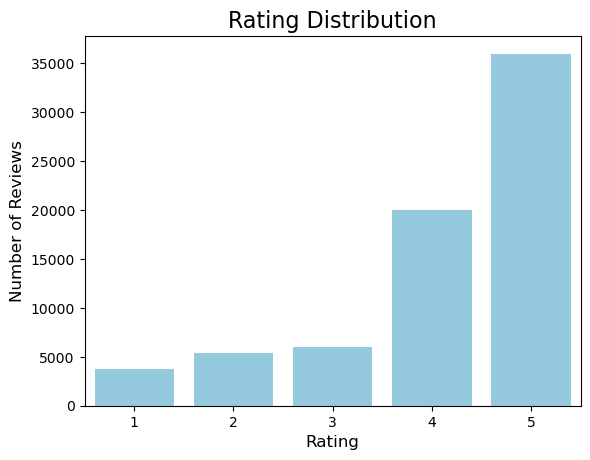

In [35]:
sns.countplot(x='Rating', data=df_sorted, color='skyblue')
plt.title('Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Rating Distribution (Pie Chart)

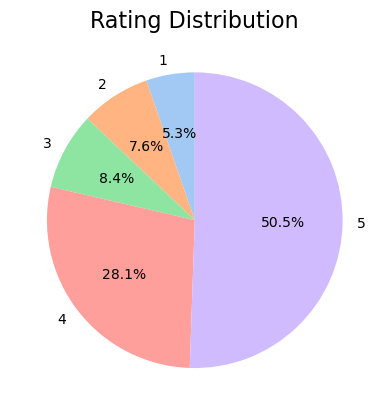

In [36]:
# Count of reviews per rating
rating_counts = df_sorted['Rating'].value_counts().sort_index()

# Labels and values for pie chart
categories = rating_counts.index
values = rating_counts.values


plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Rating Distribution", fontsize=16)
plt.show()


# Review Length Distribution (Histogram)

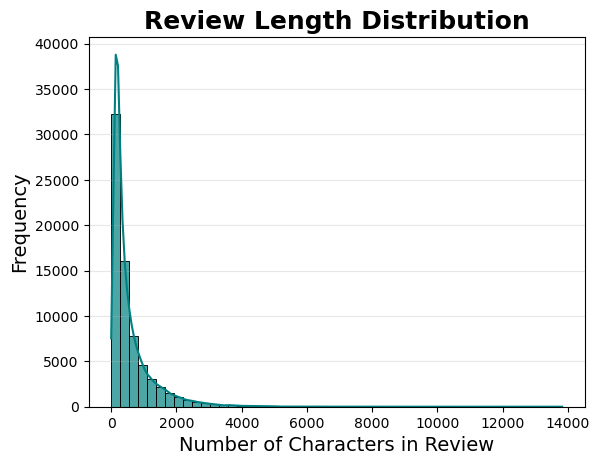

In [37]:
# Calculate review length (number of characters)
df_sorted['ReviewLength'] = df_sorted['Review'].str.len()

# Plot enhanced histogram

sns.histplot(df_sorted['ReviewLength'], bins=50, kde=True, color='teal', edgecolor='black', alpha=0.7)
plt.title('Review Length Distribution', fontsize=18, weight='bold')
plt.xlabel('Number of Characters in Review', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.show()


# Boxplot of Review Length per Rating

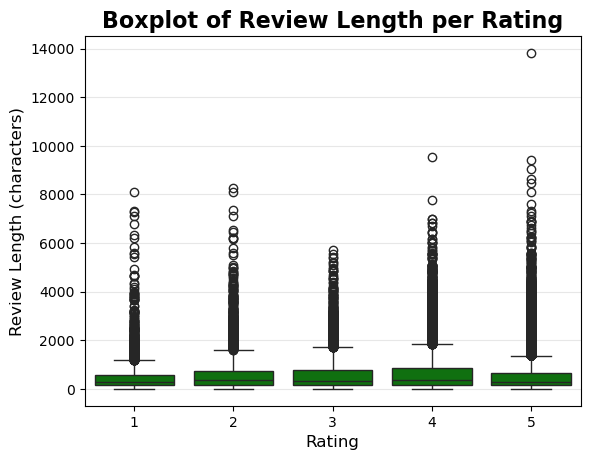

In [38]:
# Calculate review length (number of characters)
df_sorted['ReviewLength'] = df_sorted['Review'].str.len()

sns.boxplot(x='Rating', y='ReviewLength', data=df_sorted, color='green')
plt.title('Boxplot of Review Length per Rating', fontsize=16, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Review Length (characters)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()


# Violin Plot (Density + Distribution of Review Length per Rating)

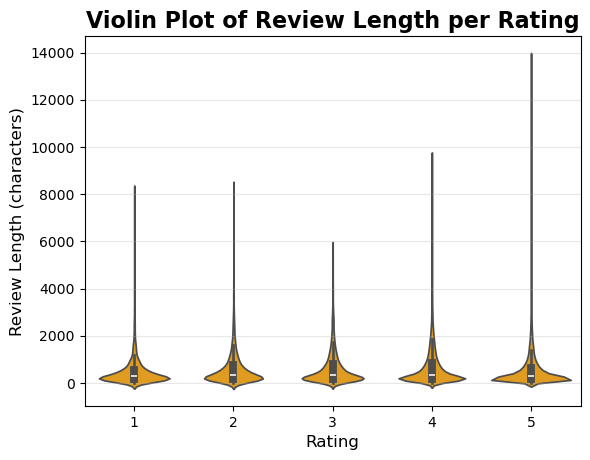

In [39]:
# Calculate review length (number of characters)
df_sorted['ReviewLength'] = df_sorted['Review'].str.len()

sns.violinplot(x='Rating', y='ReviewLength', data=df_sorted, color='orange')
plt.title('Violin Plot of Review Length per Rating', fontsize=16, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Review Length (characters)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()



# Creating Balanced Dataset

In [40]:
min_count = 2500

# Check available count per class
available_counts = df_sorted['Rating'].value_counts()
print("Available counts per class:\n", available_counts)

# Determine the maximum samples per class without duplicates
max_count = min(available_counts.min(), min_count)
print("Number of samples per class without duplicates:", max_count)

# List to hold balanced DataFrames
balanced_df_list = []

# Loop through each unique rating
for rating in sorted(df_sorted['Rating'].unique()):
    df_rating = df_sorted[df_sorted['Rating'] == rating]
    
    # Sample without replacement (no duplicates)
    df_rating_balanced = df_rating.sample(n=max_count, replace=False, random_state=42)
    balanced_df_list.append(df_rating_balanced)

# Combine all classes and shuffle
df_balanced = pd.concat(balanced_df_list).sample(frac=1, random_state=42).reset_index(drop=True)

# Check distribution
print("Balanced Dataset Distribution:\n", df_balanced['Rating'].value_counts())
print("\nBalanced dataset shape:", df_balanced.shape)


Available counts per class:
 Rating
5    35997
4    19999
3     6000
2     5435
1     3786
Name: count, dtype: int64
Number of samples per class without duplicates: 2500
Balanced Dataset Distribution:
 Rating
1    2500
5    2500
4    2500
2    2500
3    2500
Name: count, dtype: int64

Balanced dataset shape: (12500, 3)


In [41]:
# Sort balanced dataset by Rating
df_balanced_sorted = df_balanced.sort_values(by='Rating').reset_index(drop=True)

# Verify distribution per rating
print("Balanced dataset distribution by Rating:\n", df_balanced_sorted['Rating'].value_counts())

# Preview first few rows
display(df_balanced_sorted.head())


Balanced dataset distribution by Rating:
 Rating
1    2500
2    2500
3    2500
4    2500
5    2500
Name: count, dtype: int64


,Rating,Review,ReviewLength
0,1,I didnt really like ths book because their was...,104
1,1,I have a Kindle DX and the text to speech keep...,126
2,1,"I don't like the character Natalie, i.e. the h...",1582
3,1,This book was one of the most poorly edited bo...,216
4,1,I simply could not find a story in what felt l...,164


In [42]:
# Save the balanced dataset to CSV
df_balanced_sorted.to_csv(r"..\data\new data\balanced_reviews.csv", index=False)

print("Balanced dataset saved ")


Balanced dataset saved 


# Data Visualization of balanced Data

# Rating Distribution (Bar Chart)

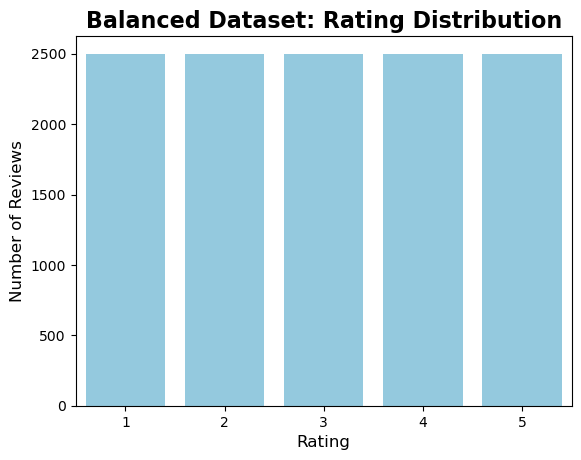

In [43]:

sns.countplot(x='Rating', data=df_balanced_sorted, color='skyblue')
plt.title('Balanced Dataset: Rating Distribution', fontsize=16, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# Rating Distribution (Pie Chart)

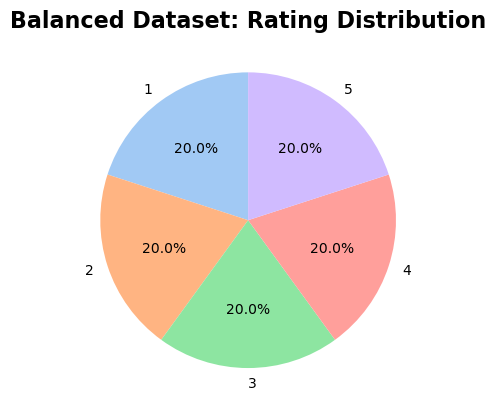

In [44]:
# Count of reviews per rating
rating_counts = df_balanced_sorted['Rating'].value_counts().sort_index()

# Labels and values for pie chart
categories = rating_counts.index
values = rating_counts.values

plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Balanced Dataset: Rating Distribution", fontsize=16, weight='bold')
plt.show()


# Creating Imbalanced dataset

In [45]:
# Remove balanced dataset rows from the original cleaned dataset
df_remaining = df_sorted.merge(
    df_balanced_sorted[['Rating','Review']], 
    on=['Rating','Review'], 
    how='left', 
    indicator=True
)

# Keep only rows not in the balanced dataset
df_remaining = df_remaining[df_remaining['_merge'] == 'left_only'] \
                          .drop(columns=['_merge']) \
                          .reset_index(drop=True)

print("Remaining dataset shape after removing balanced:", df_remaining.shape)

# Define target imbalanced ratios
ratios = {1: 0.10, 2: 0.15, 3: 0.25, 4: 0.30, 5: 0.20}

# Calculate total remaining rows
total_remaining = len(df_remaining)
Imbalanced_df_list = []

# Sample each rating class without duplicates
for rating, ratio in ratios.items():
    df_rating = df_remaining[df_remaining['Rating'] == rating]
    sample_size = int(total_remaining * ratio)

    # Ensure we do not sample more than available rows
    sample_size = min(sample_size, len(df_rating))

    if sample_size > 0:
        df_rating_unbalanced = df_rating.sample(n=sample_size, replace=False, random_state=42)
        Imbalanced_df_list.append(df_rating_unbalanced)
    else:
        print(f"Skipping Rating {rating} (not enough samples left).")

# Combine all sampled ratings and shuffle
df_Imbalanced = pd.concat(Imbalanced_df_list).sample(frac=1, random_state=42).reset_index(drop=True)

# Check distribution
print("\nImbalanced Dataset Distribution (no duplicates):\n", df_Imbalanced['Rating'].value_counts())
print("Imbalanced dataset shape:", df_Imbalanced.shape)


Remaining dataset shape after removing balanced: (58717, 3)

Imbalanced Dataset Distribution (no duplicates):
 Rating
4    17499
5    11743
3     3500
2     2935
1     1286
Name: count, dtype: int64
Imbalanced dataset shape: (36963, 3)


In [46]:
# Convert Ratings to numeric (integer)
df_Imbalanced['Rating'] = pd.to_numeric(df_Imbalanced['Rating'], errors='coerce').astype('Int64')

# Drop rows with invalid Ratings (if any)
df_Imbalanced = df_Imbalanced.dropna(subset=['Rating'])

# Sort by Rating
df_Imbalanced_sorted = df_Imbalanced.sort_values(by='Rating').reset_index(drop=True)

# Check counts per rating
rating_counts = df_Imbalanced['Rating'].value_counts().sort_index()
print("Imbalanced Dataset Distribution (Sorted):\n", rating_counts)


df_Imbalanced_sorted.head()


Imbalanced Dataset Distribution (Sorted):
 Rating
1     1286
2     2935
3     3500
4    17499
5    11743
Name: count, dtype: Int64


,Rating,Review,ReviewLength
0,1,This book was so short it wouldn't even qualif...,113
1,1,I can't believe all the good reviews for this ...,259
2,1,Loved the book. Great mystery and love story. ...,133
3,1,Like another reviewer I found this book creepy...,212
4,1,This book was a real let down. Gets into peopl...,165


In [47]:
# Save the imbalanced dataset to CSV
df_Imbalanced_sorted.to_csv(r"..\data\new data\Imbalanced_reviews.csv", index=False)

print("Imbalanced dataset saved")


Imbalanced dataset saved


# Data Visualization of Imbalanced Data

# Rating Distribution (Bar Chart)

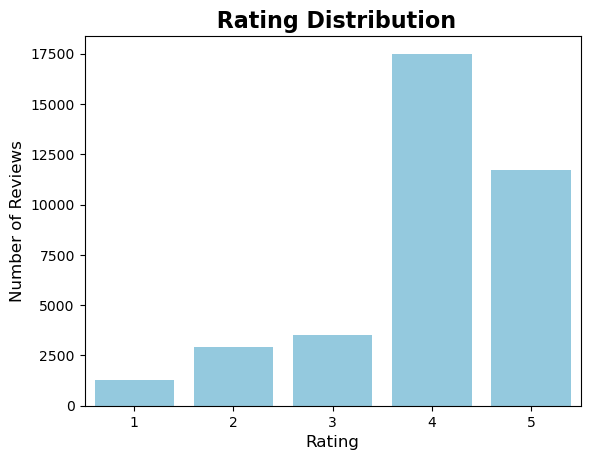

In [48]:

sns.countplot(x='Rating', data=df_Imbalanced_sorted, color='skyblue')
plt.title(' Rating Distribution', fontsize=16, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# Rating Distribution (Pie Chart)

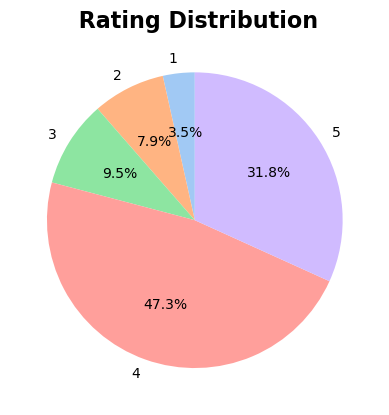

In [49]:
# Count of reviews per rating
rating_counts = df_Imbalanced_sorted['Rating'].value_counts().sort_index()

# Labels and values for pie chart
categories = rating_counts.index
values = rating_counts.values

plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title(" Rating Distribution", fontsize=16, weight='bold')
plt.show()
